# Continous random variables
***Reading: Emile-Geay: Chapter 3***

In [1]:
%reset
import numpy as np
import matplotlib.pyplot as plt


# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Definition

Just like a discrete random variable (r.v.) , a continous random variable is a function that is defined on a samples 
space and takes value in the real numbers. However, unlike a discrete r.v. which takes a discrete set of values either finite or countably infinite, a continuous r.v. takes an uncountable number of values. For example, it might take any 
value in a given interval, or it might take any value in the real numbers. 

In this class, we will almost exclusively deal with continuous random variables, used to describe properties such as temperature, velocity, etc of continuous media such as as air, water, Earth's mantle, etc.  

# 1 Distribution functions
### 1.1 Cumulative Distribution function (CDF).

The cumulative distribiution function (CDF), $F(x)$, of a random variable - wheteher discrete or continuous - is defined as: 
$$F(x)=P(X\leq x)$$

The CDF exists for any random variable, is piece-wise continous, and takes values between 0 an 1. If the random variables takes values in the interval $[x_{min},x_{max}]$, then $F(x)=0$ for $x<x_{min}$ and $F(x)=1$ for $x>x_{max}$

For a discrete random variable: 
$$F(x)=\sum_i P(X=x_i)=\sum_{i:x_i<x}f(x_i)$$ 

where $f(x_i)$ is the pmf of X. For a discrete r.v. the CDF is going to look like a staircase, with jumps at the values $x_i$ that $X$ can take. 

In contrast, continuous random variables will have a continous CDFs. For the continous random variables considered in this class, the CDF will also be differentiable. Which means that we can also define a probability density function. 




## 1.2 Probability density functions (pdf) for continuous r.v.s

The distribution of a continuous random variable is generally defined by a probability density function, or *pdf*. We will denote the pdf of r.v. $X$ by $f_X(x)$ or, more commonly, simply by $f(x)$. The pdf of $X$ is the probability that $X$ takes a values in an infinitesimalinterval around $x$:
$$f(x)=P(X\in [x,x+dx])$$
or 
$$P(x\in [x_1,x_2])=\int_{x_1}^{x_2} f(x)dx$$

The pdf of a continuous r.v. must satisfy a few properties, such as $ \int_{-\infty}^{+\infty}f(x)dx=1$ and $f(x)>0$. There is a simple relation between the CDF and the pdf of a continuous r.v. analaogos to that between the CDF and the pmf of a discrete r.v.:
$$F(x)=P(X<x)=\int_{-\infty}^{u}f(u)du$$

## 1.3 Histogram
Just like for discrete r.v.s, we can use a histogram to approximate the pdf of a continuous random variable. The histogram makes more sense for a continous random variable. To compute a histogram we will need to define a set of bin edges ${x_i}$, the histogram counts the number of realizations in each bin. So, 
$$h(x_i,x_j)= \text{# of realizations of }X\text{ between }x_i,x_j. $$

A scaled, or normed, histogram is

$$h(x_i,x_{i+1})= \frac{\text{# of realizations of }X\text{ between }x_i,x_{i+1}}{(\text{total # of realizations of }X )(x_{i+1}-x_i)}. $$

For a very large number of realizations, the histogram will be equal to the average value of the pdf within a bin:
$$h(x_i,x_{i+1})\approx \overline {f(x_i)}=\frac{\int_{x_i}^{x_i+1} f(u)du}{x_{i+1}-x_i}$$

As long as the lower bin $x_1$ is low enough that the probability of X taking values lower than it is small or zero, $f(x)\approx0$, for $x<x_1$, we can also use a histogram to approximate a CDF: 
$$F(x_i)=\int_{-\infty}^{x_i}f(u)du \approx \sum_{j=0}^{j-1}\int_{x_i}^{x_i+1} f(u)du\approx\sum_{j=1}^{i-1} h(x_j,x_j+1)\cdot (x_{i+1}-x_i)$$

All of the above will make more sense with some examples:
<hr style="border:2px solid black"> </hr>

# 2 Examples of continuous random variables
## 2.1 Uniform 
The uniform distribution is the distribution of a random variable which has equal probabiliy of taking any value within an interval. The interval can be either open or closed, e.g. $[a,b], [a,b)$ or $(a,b)$. The pdf of a continuous uniform r.v. defined in $[a,b]$ is

$$p(x)=\begin{cases}
\frac{1}{b-a} & \text{if }x\in[a,b]\\
0 & \text{if }x\notin[a,b]
\end{cases}$$

the $1/(b-a)$ comes from the condition that the pdf integrates to $1$. The CDF of a uniform r.v. is. 
$$F(x)=\int_{-\infty}^{x}f(u)du$$

$$F(x)=\begin{cases}
0 & \text{if }x<a\\
\frac{x-a}{b-a} & \text{if }x\in[a,b]\\
1 & \text{if }x>b
\end{cases}$$



Let's plot the pdf & CDF of a uniform random variable 

Note <code>scipy</code> defines a continous uniform r.v. distribution in terms of location <code>loc</code> and <code>scale</code>, parameters, i.e. the r.v. is defined in $[\text{loc},\text{loc}+\text{scale}]$. 


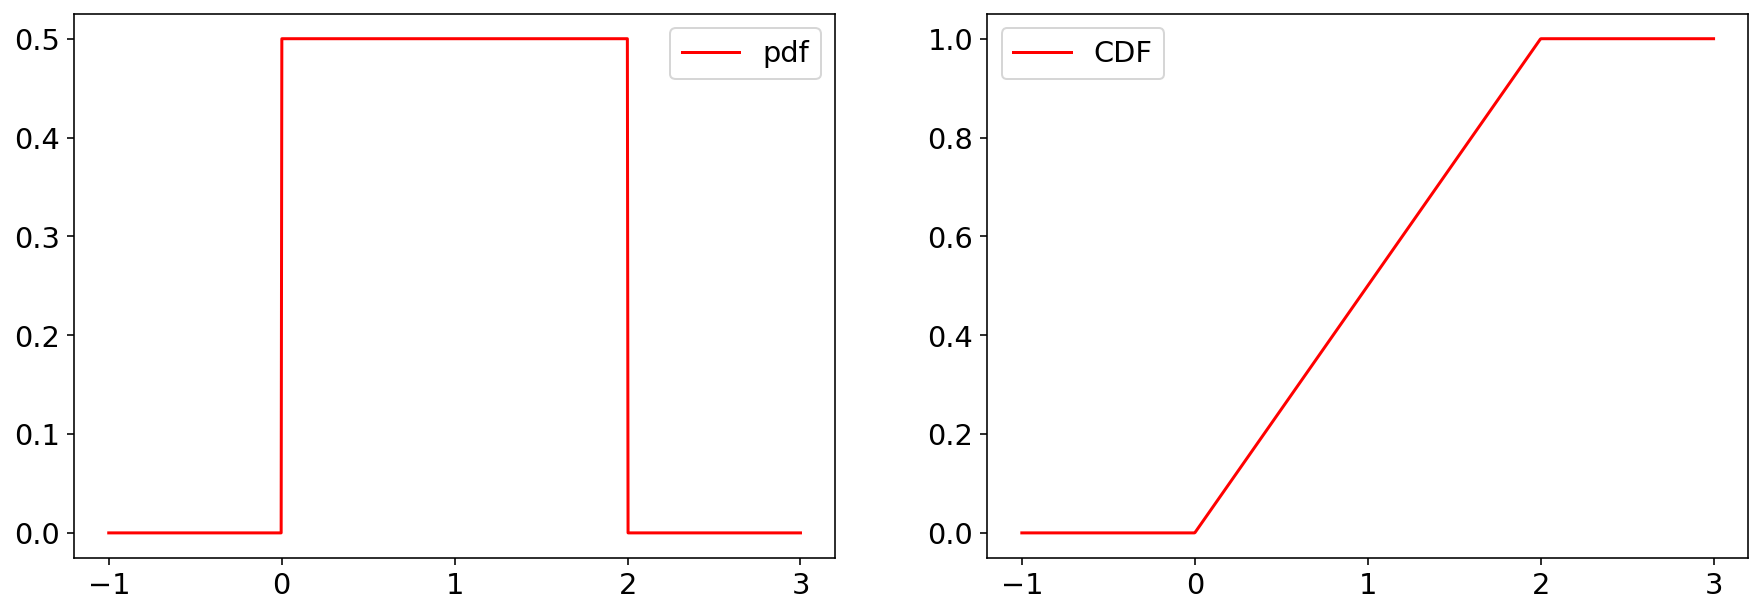

In [2]:
from scipy import stats

# let's define a uniform r.v. on the interval 0,2
loc=0;
scale=2;


# pdf,cdf
x_uniform=np.linspace(-1,3,1000)
f_uniform=stats.uniform.pdf(x_uniform,loc=loc,scale=scale)
F_uniform=stats.uniform.cdf(x_uniform,loc=loc,scale=scale)

#plot
fig, ax = plt.subplots(1, 2)

ax[0].plot(x_uniform,f_uniform , 'r-',ms=10,label='pdf')
ax[0].legend()

ax[1].plot(x_uniform,F_uniform , 'r-',ms=10,label='CDF')
ax[1].legend()


Let's generate some samples and compute a histogram.

<ipython-input-3-c5a779c76d93>:27: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  histogram=np.histogram(X_uniform,bin_edges_uniform, normed=True)[0]


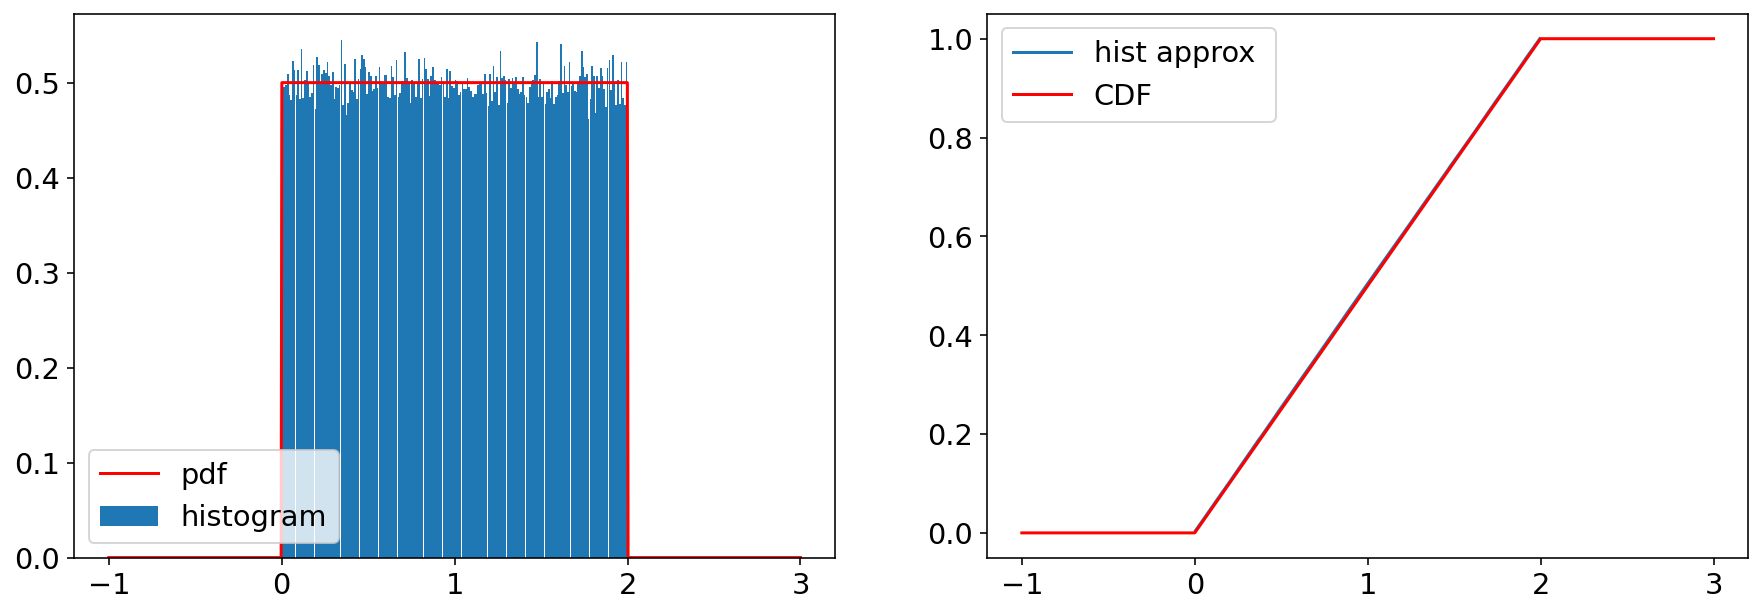

In [3]:
loc=0;
scale=2;

Ndraws=200000;
Nbin_edges=201;

# pdf,cdf
x_uniform=np.linspace(-1,3,1000)
f_uniform=stats.uniform.pdf(x_uniform,loc=loc,scale=scale)
F_uniform=stats.uniform.cdf(x_uniform,loc=loc,scale=scale)


# generate random variables 
X_uniform=stats.uniform.rvs(loc=loc,scale=scale, size=Ndraws)
# let's examine the draws. remember they should be uniformyl distributed between loc and loc+scale
#print(X_uniform)


# let's compute the histogram, compare it to the pdf, and use it to approximate the CDF
# we'll use the numpy histogram function, since we need the values of the histogram. 
# Note the numpy histogram function outputs both histogram values and bin edges. 
#We only need the values, so we need to take the first component, [0], of the output

bin_edges_uniform=np.linspace(0,2,Nbin_edges)
bin_centers=(bin_edges_uniform[1:]+bin_edges_uniform[0:-1])/2

histogram=np.histogram(X_uniform,bin_edges_uniform, normed=True)[0]
F_approx=np.cumsum(histogram)*np.mean(np.diff(bin_edges_uniform))

fig, ax = plt.subplots(1, 2)
ax[0].hist(X_uniform,bin_edges_uniform,density=True,rwidth=0.95,label='histogram')
ax[0].plot(x_uniform,f_uniform , 'r-',ms=10,label='pdf')
ax[0].legend()

ax[1].plot(bin_centers,F_approx,label='hist approx ')
ax[1].plot(x_uniform,F_uniform , 'r-',ms=10,label='CDF')
ax[1].legend()


## 2.1 Normal/Gaussian
The most common distribution we will encounter is the Gaussian (or Normal distribution). It is the most commonly occuring distribution in nature - and it is in fact the *central* distribution to which other distributions gravitate, as we shall discuss later. More properties of the gaussian distribution will come up thrughout the course, but let's introduce it here: 

The pdf of a gaussian(normal distribution) is defined by two parameters, $\mu$ and $\sigma$, called the locatoin and the scale parameter, which, as we shall see, are also the mean and standard deviation. We wil learn more about these parameters in the next chapter, but it's easier to illustrate them once we have some distributions from which we can generate samples. 
$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]$$

<ipython-input-4-c7b80a2f7208>:28: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  histogram=np.histogram(X_norm,bin_edges, normed=True)[0]


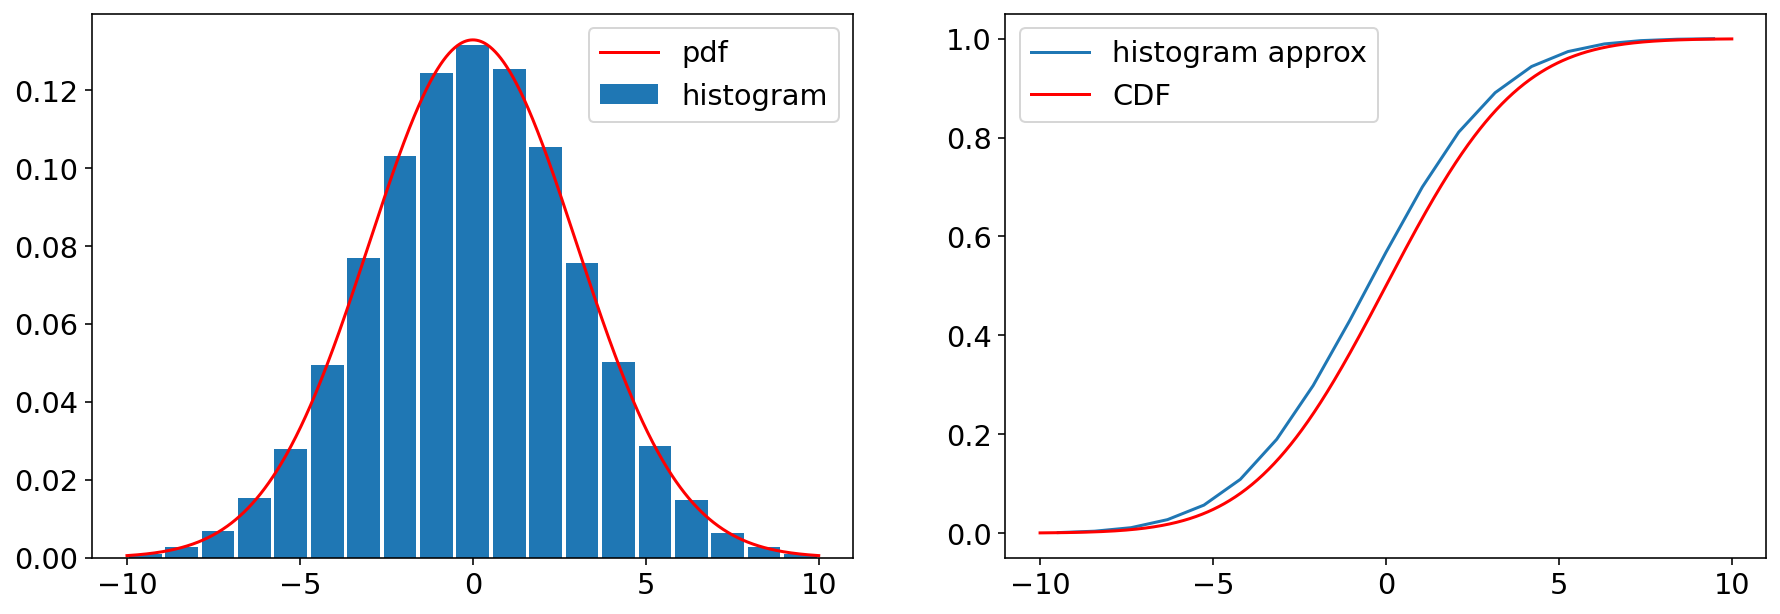

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# scipy defines mu as locatiom, and sigma as scale. 
# Play around with these parametrs to see how the distribution changes. 


xlim_left=-10;
xlim_right=10;

mu=0;
sigma=3;

# you should also play arond with the number of draws and bins of the histogram.
# there are some guidelines for choosing the number of bins (Emile-Geay's book talks a bit about them)
Ndraws=200000;
Nbin_edges=20;

# pdf,cdf
x_norm=np.linspace(xlim_left,xlim_right,1000)
f_norm=stats.norm.pdf(x_norm,loc=mu, scale=sigma)
F_norm=stats.norm.cdf(x_norm,loc=mu,scale=sigma)

# generate random variables and define edges (note we want the integers to be in the bins, not at the edges)
X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=Ndraws)
bin_edges_norm=np.linspace(xlim_left,xlim_right,Nbin_edges)

bin_edges=np.linspace(xlim_left,xlim_right,Nbin_edges)
bin_centers=(bin_edges[1:]+bin_edges[0:-1])/2
histogram=np.histogram(X_norm,bin_edges, normed=True)[0]
F_approx=np.cumsum(histogram)*np.mean(np.diff(bin_edges))


fig, ax = plt.subplots(1,2)



ax[0].plot(x_norm,f_norm , 'r-',ms=10,label='pdf')
ax[0].hist(X_norm,bins=bin_edges_norm,density=True,rwidth=0.9,label='histogram')
ax[0].legend()

ax[1].plot(bin_centers,F_approx,label='histogram approx')
ax[1].plot(x_norm,F_norm , 'r-',ms=10,label='CDF')

ax[1].legend()


ax[1].legend()



# 3. Mixed random variables
Some random variables are "mixed" random variables, where the distribution contains a discrete part, and a continuous part. 

Take, for example, the distribution of precipitation amount at Willard airport from 1997 until today.

<ipython-input-5-d2dd63b765d9>:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  histogram=np.histogram(precip_willard,bin_edges, normed=True)[0]


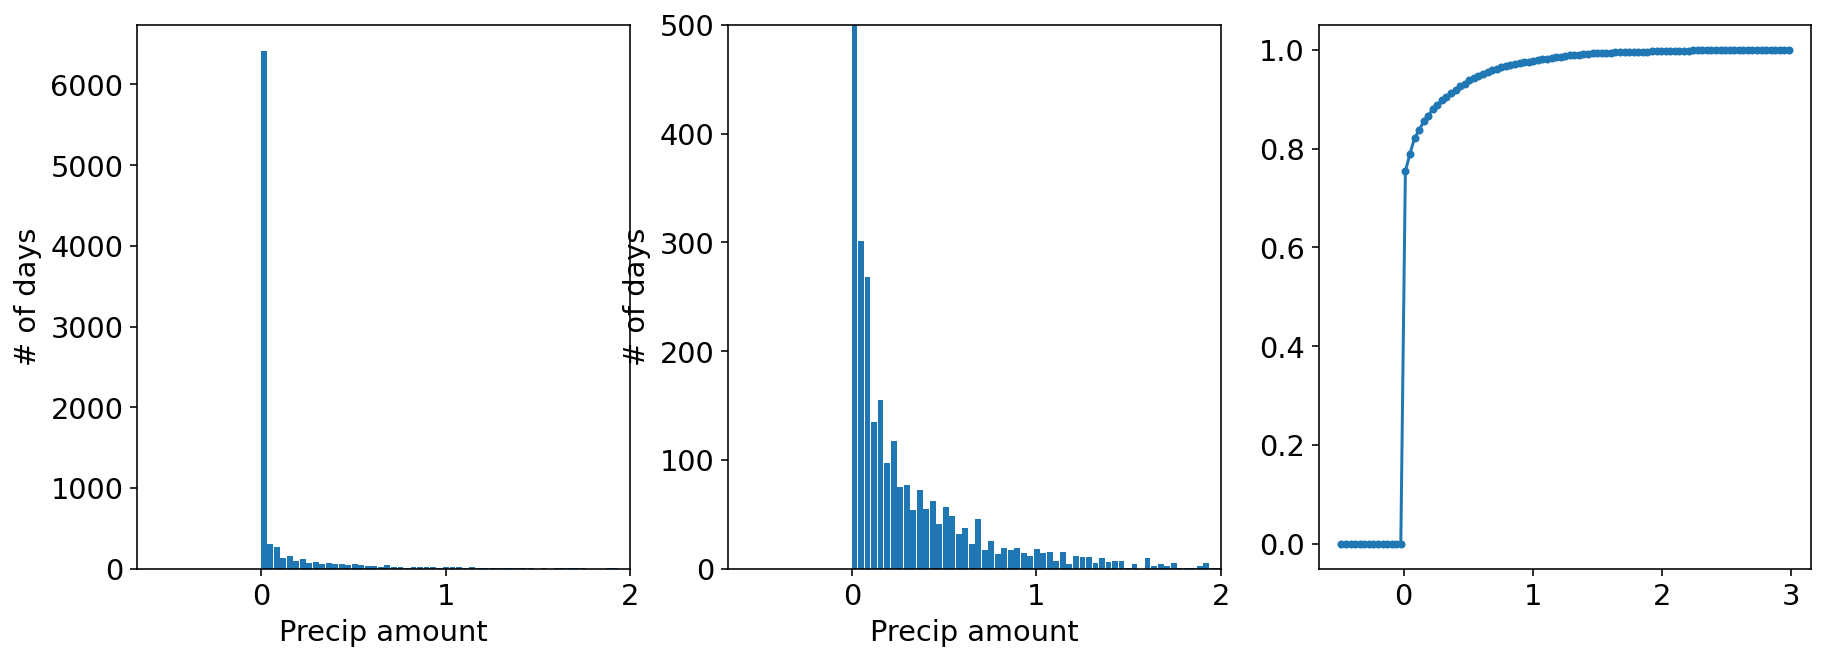

In [5]:
import pandas as pd

df=pd.read_csv('/data/keeling/a/cristi/a/SIMLES/Module01/Willard_Temp_precip.csv')
precip_willard=df['PRCP'];

Nbin_edges=100
xlim_left=-0.5
xlim_right=3

bin_edges=np.linspace(xlim_left,xlim_right,Nbin_edges)
bin_centers=(bin_edges[1:]+bin_edges[0:-1])/2
histogram=np.histogram(precip_willard,bin_edges, normed=True)[0]
F_approx=np.cumsum(histogram)*np.mean(np.diff(bin_edges))



fig, ax = plt.subplots(1, 3)
ax[0].hist(precip_willard,bin_edges,density=False,rwidth=0.9)
ax[0].set_xlim(right=2)
ax[0].set_ylabel('# of days')
ax[0].set_xlabel('Precip amount')


ax[1].hist(precip_willard,bin_edges,density=False,rwidth=0.9)
ax[1].set_xlim(right=2)
ax[1].set_ylim(top=500)
ax[1].set_ylabel('# of days')
ax[1].set_xlabel('Precip amount')

ax[2].plot(bin_centers,F_approx,'.-',label='CDF approximation')
# approximate the cdf

What do we see? Notice the jump in the CDF at 0. This means there is about an $80\%$ probability that there is no rain, i.e. it only rains on $20\%$ of days. So for $x=0$, there is a finite probability $P(X=0)=20\%$. For everything else, the probability is (in principle) continuous, and described by a continous pdf that describes the probability of precipitation falling in an infinitesimal interval around x. 

In practice, when working with real data all distributions will be discretized by the measurement precision of the instrument used.



# 4 Exercises
Plot the pdf, cdf, and draw histogram for a few other common distributions. The easiest way to find the relevant modules in scipy.stats is to google "scipy stats poisson" and so on.

Here are a few suggestions:
- Discrete:
    - poisson distribution
    - binomial distribution
- Continuous
    - exponential distribution
    - laplace distribution
    - gamma distribution
